In [ ]:
pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.4 MB/s eta 0:00:00
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9406 sha256=b48e5045aee2dfac4d359673a569865f45da814675647d69cb5a59263d1b01f7
  Stored in directory: /root/.cache/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install statsmodels==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 46.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import networkx as nx
import pickle
import numpy as np
import scipy.stats  
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import json
import math
import time
import pandas as pd
import seaborn as sns
import community as community_louvain
import matplotlib.cm as cm

In [ ]:
pip install networkx==3.2.1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### DATA SCRAPING

In [ ]:
##transforming the data that i have "languageName.txt" into a more useable data "output.txt"
import os

def convert_files_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            subdir = os.path.join(root, dir_name)
            for filename in os.listdir(subdir):
                if filename.endswith(".txt"):
                    input_file = os.path.join(subdir, filename)
                    output_file = os.path.join(subdir, "output.txt")
                    convert_to_single_word_per_line(input_file, output_file)

def convert_to_single_word_per_line(input_file, output_file):
    with open(input_file, 'r', encoding='ISO-8859-1') as f_input:
        content = f_input.read()
        words = content.split(',')
    
    with open(output_file, 'w', encoding='ISO-8859-1') as f_output:
        for word in words:
            f_output.write(word.strip() + '\n')

if __name__ == "__main__":
    directory = "/work/Users/nalan/Downloads/all-words-in-all-languages-main/" 
    convert_files_in_directory(directory)


### GRAPH

Nodi: 88
Archi: 1104


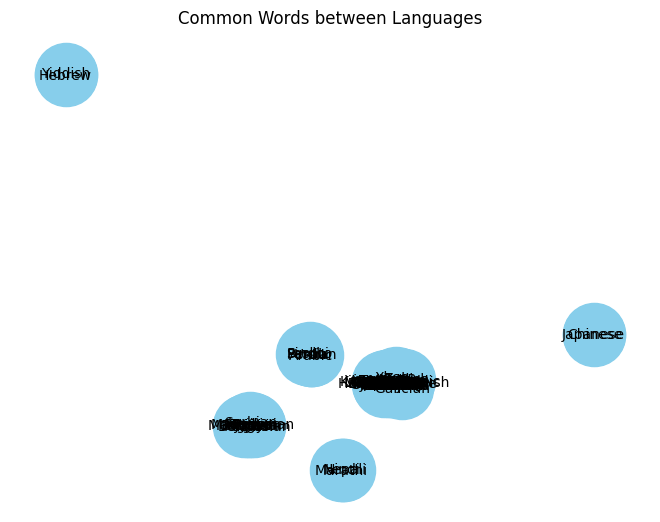

In [ ]:

import os
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import math

def read_dictionary(file_path):
    words = set()
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        for line in file:
            word = line.strip()
            words.add(word)
    return words

def find_common_words(language1, language2):
    common_words = language1.intersection(language2)
    return len(common_words)

def create_graph(main_directory, output_file):
    # Create a graph
    G = nx.Graph()
    language_words = defaultdict(set)

    # Iterate over subdirectories in the main directory
    for dir_name in os.listdir(main_directory):
        if os.path.isdir(os.path.join(main_directory, dir_name)):
            language = dir_name
            file_path = os.path.join(main_directory, dir_name, "output.txt")
            if os.path.exists(file_path):
                language_words[language] = read_dictionary(file_path)

    # Find common words between pairs of languages and add edges to the graph
    with open(output_file, 'w') as f_out:
        languages = list(language_words.keys())
        for i in range(len(languages)):
            lang1 = languages[i]
            for j in range(i + 1, len(languages)):
                lang2 = languages[j]
                common_words_count = find_common_words(language_words[lang1], language_words[lang2])
                output = f"Common words between {lang1} and {lang2}: {common_words_count}\n"
                f_out.write(output)
                if common_words_count>100:
                    G.add_edge(lang1, lang2, weight=common_words_count)
                
    
    return G

if __name__ == "__main__":
    main_directory = "/work/Users/nalan/Downloads/all-words-in-all-languages-main/"  
    output_file = "/work/output.txt"
    # Create the graph
    GraphL = create_graph(main_directory, output_file)

    # Get positions for drawing
    pos = nx.spring_layout(GraphL, k=5/math.sqrt(GraphL.order()), iterations=300)

    print(f'Nodi: {GraphL.order()}')
    print(f'Archi: {GraphL.number_of_edges()}')
    # Draw the graph
    nx.draw(GraphL, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    labels = nx.get_edge_attributes(GraphL, 'weight')
    nx.draw_networkx_edge_labels(GraphL, pos, edge_labels=labels)
    plt.title('Common Words between Languages')
    plt.show()



In [ ]:
!pip install networkx==3.2.1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### TOP 100 NODES(LANGUAGES) WITH THE MOST COMMON WORDS 

In [ ]:
import numpy as np

top_10_edges = sorted(GraphL.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:100]

# Print the top 10 edges
print("Top 100 nodes with the most common words:")
for edge in top_10_edges:
    print(edge)


Top 100 nodes with the most common words:
('Czech', 'Slovak', {'weight': 101745})
('Portuguese', 'Spanish', {'weight': 85169})
('Polish', 'Slovak', {'weight': 52018})
('English', 'Slovak', {'weight': 45213})
('Danish', 'Slovak', {'weight': 44877})
('Danish', 'Norwegian', {'weight': 44430})
('Danish', 'Swedish', {'weight': 41988})
('Danish', 'English', {'weight': 41236})
('Filipino', 'Slovak', {'weight': 25774})
('English', 'Filipino', {'weight': 23767})
('Danish', 'Dutch', {'weight': 23283})
('Italian', 'Spanish', {'weight': 22998})
('Danish', 'Portuguese', {'weight': 22887})
('Persian', 'Urdu', {'weight': 22314})
('Italian', 'Portuguese', {'weight': 19880})
('German', 'Slovak', {'weight': 19041})
('Italian', 'Romanian', {'weight': 17698})
('Arabic', 'Persian', {'weight': 17289})
('Danish', 'French', {'weight': 17149})
('Portuguese', 'Slovak', {'weight': 16792})
('Danish', 'Polish', {'weight': 16409})
('English', 'French', {'weight': 16328})
('English', 'Polish', {'weight': 15954})
('D

### STATISTICHE

In [ ]:
!pip install statsmodels==0.14.1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Statistiche della rete:
Nodi: 88
Archi: 1104
Densità: 0.2884012539184953
Average Clustering Coefficient: 0.8355953367946589
Reciprocità: 0.0
Assortatività: -0.17213656511713607

 Statistiche sul grado:
Grado medio: 25.09090909090909
Deviazione standard: 19.222167815758713
Mediana: 21.0
Grado Minimo: 1
Grado Massimo: 64
The graph is undirected.


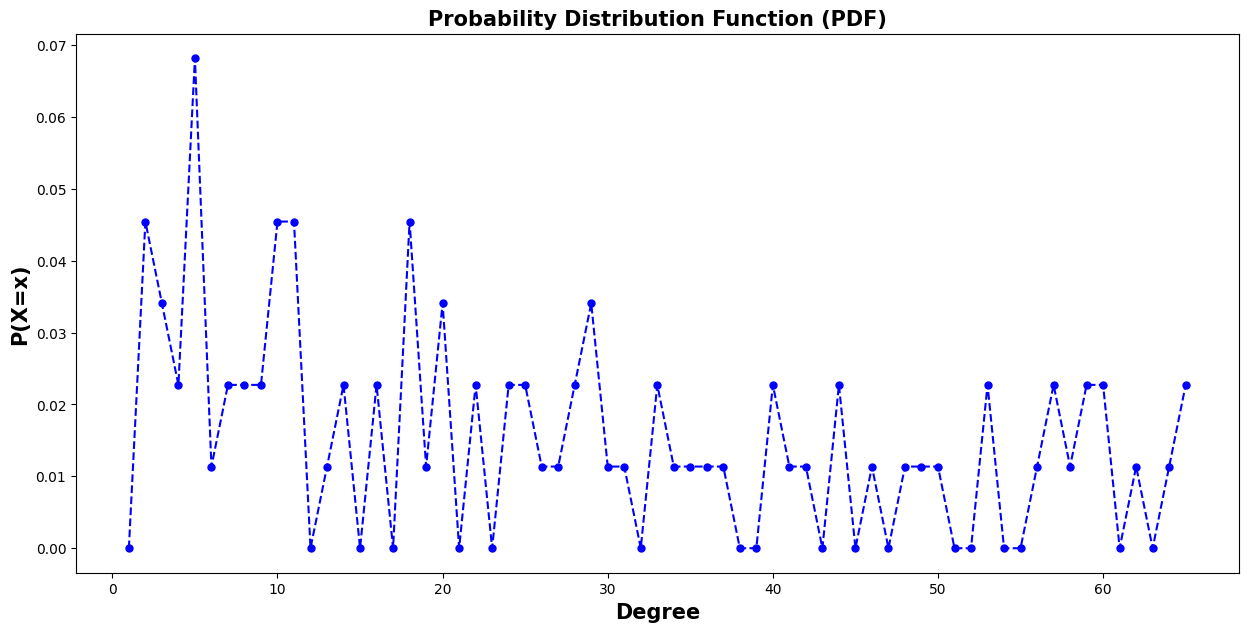

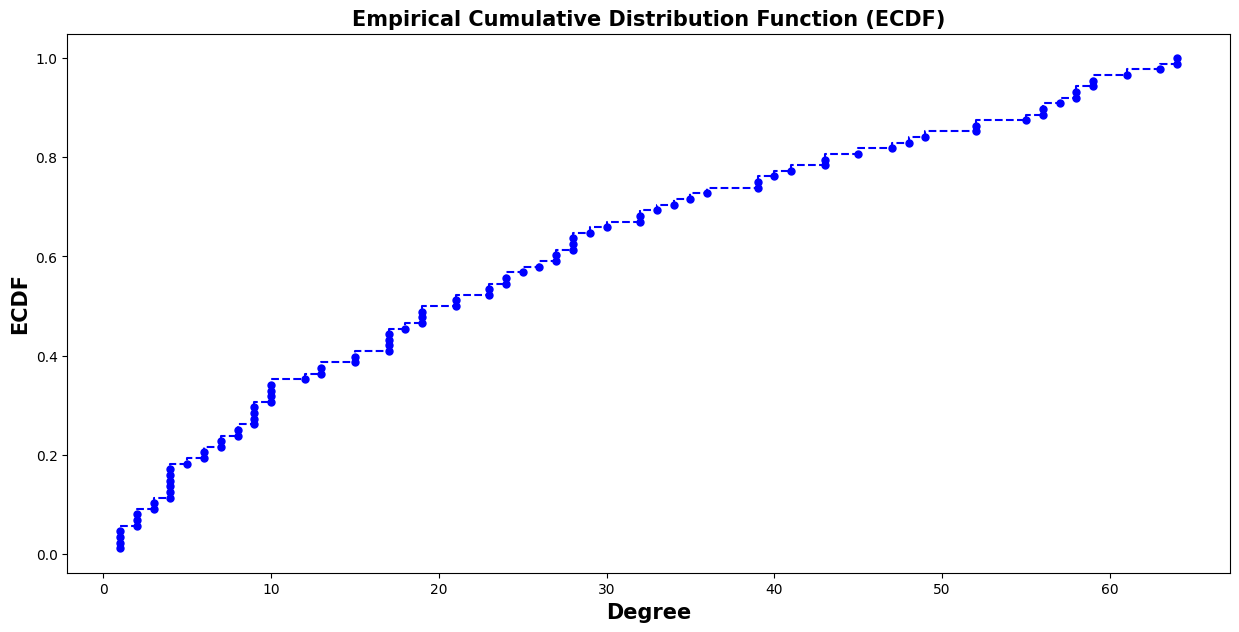

In [ ]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

print('Statistiche della rete:')
print(f'Nodi: {GraphL.order()}')
print(f'Archi: {GraphL.number_of_edges()}')
print(f'Densità: {nx.density(GraphL)}')
degree = dict(GraphL.degree())
degree_list = list(degree.values())
# Average Clustering Coefficient
avg_clustering_coefficient = nx.average_clustering(GraphL)
print("Average Clustering Coefficient:", avg_clustering_coefficient)
# Reciprocity
reciprocity = nx.reciprocity(GraphL)
print("Reciprocità:", reciprocity)
# Assortativity
assortativity = nx.degree_assortativity_coefficient(GraphL)
print("Assortatività:", assortativity)
degree_sequence = list(dict(GraphL.degree()).values())

print('\n Statistiche sul grado:')
print(f'Grado medio: {np.mean(degree_list)}')
print(f'Deviazione standard: {np.std(degree_list)}')
print(f'Mediana: {np.median(degree_list)}')
print(f'Grado Minimo: {np.min(degree_list)}')
print(f'Grado Massimo: {np.max(degree_list)}')

# Check if the graph is directed
is_directed = GraphL.is_directed()

if is_directed:
    print("The graph is directed.")
else:
    print("The graph is undirected.")

# PDF (Probability Distribution Function)
degree_sequence = list(dict(GraphL.degree()).values())
degree_counts = np.bincount(degree_sequence)
pdf = degree_counts / len(degree_sequence)

# Calculating the histogram
count, bins = np.histogram(degree_sequence, bins=np.arange(min(degree_sequence), max(degree_sequence)+3))

# Plotting PDF
fig = plt.figure(figsize=(15, 7))
plt.plot(bins[:-1], pdf, color='blue', marker='o', linestyle='--', ms=5)
plt.xlabel('Degree', size=15, weight='bold')
plt.ylabel('P(X=x)', size=15, weight='bold')
plt.title('Probability Distribution Function (PDF)', size=15, weight='bold')
plt.show()

# Calculate ECDF using statsmodels ECDF
ecdf = ECDF(degree_sequence)

# Plotting ECDF
fig = plt.figure(figsize=(15, 7))
plt.step(ecdf.x, ecdf.y, marker='o', linestyle='--', color='blue', ms=5)
plt.xlabel('Degree', size=15, weight='bold')
plt.ylabel('ECDF', size=15, weight='bold')
plt.title('Empirical Cumulative Distribution Function (ECDF)', size=15, weight='bold')
plt.show()


### Centralità

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



# Calcola il grado di centralità
degree_centrality = nx.degree_centrality(GraphL)

# Calcola la centralità di intermediarietà (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(GraphL)

# Calcola la centralità di vicinanza (closeness centrality)
closeness_centrality = nx.closeness_centrality(GraphL)

# Calcola la centralità di autovettore (eigenvector centrality)
eigenvector_centrality = nx.eigenvector_centrality(GraphL)





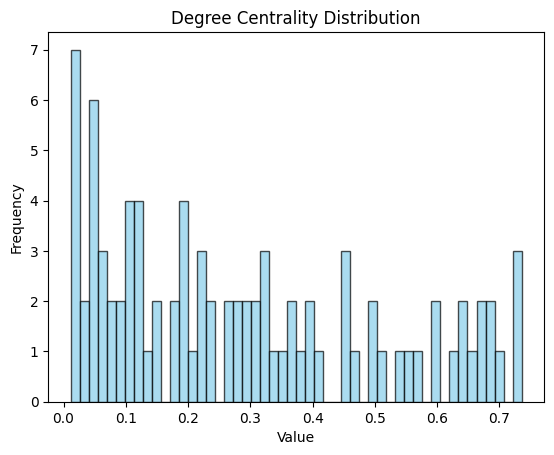

Nodes with the highest degree centrality (hubs): ['Danish', 'Portuguese'] 0.735632183908046


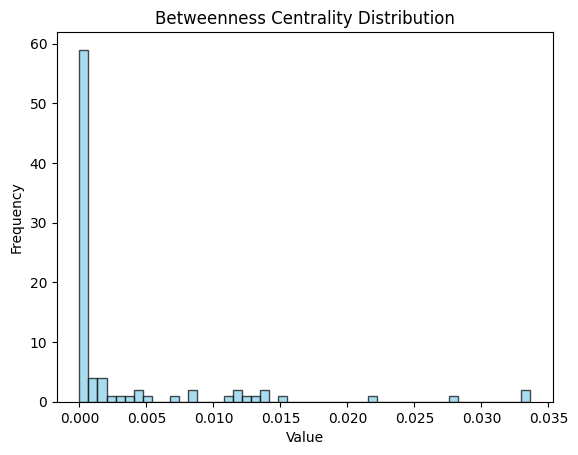

Nodes with the highest betweenness centrality (hubs): ['Danish', 'Portuguese'] 0.03365622032112665


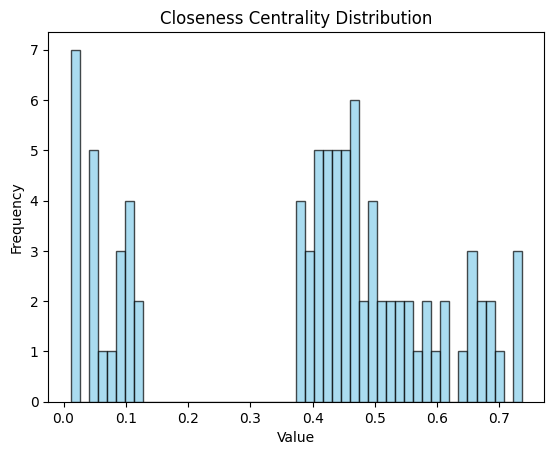

Nodes with the highest closeness centrality (hubs): ['Danish', 'Portuguese'] 0.735632183908046


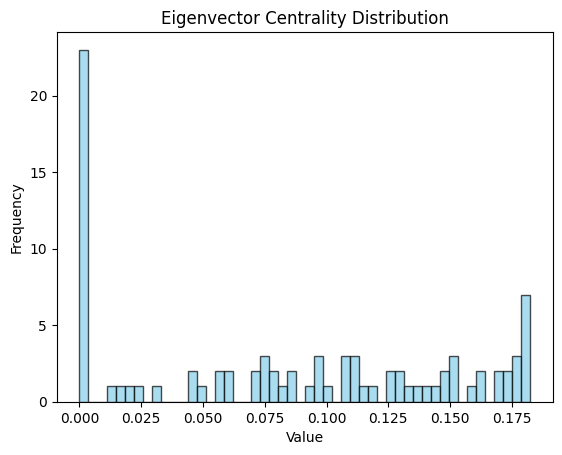

Nodes with the highest eigenvector centrality (hubs): ['Danish', 'Portuguese'] 0.18247655755433131


In [ ]:
import matplotlib.pyplot as plt

def draw_histogram(measures, measure_name):
    plt.hist(measures.values(), bins=50, edgecolor='black', color='skyblue', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{measure_name} Distribution')
    plt.show()

# Esempio di utilizzo con la centralità del grado
draw_histogram(nx.degree_centrality(GraphL), 'Degree Centrality')
max_degree_centrality = max(degree_centrality.values())
hubs = [node for node, centrality in degree_centrality.items() if centrality == max_degree_centrality]
print("Nodes with the highest degree centrality (hubs):", hubs,max_degree_centrality)

draw_histogram(nx.betweenness_centrality(GraphL),'Betweenness Centrality')
max_betweenness_centrality = max(betweenness_centrality.values())
hubs = [node for node, centrality in betweenness_centrality.items() if centrality == max_betweenness_centrality]
print("Nodes with the highest betweenness centrality (hubs):", hubs,max_betweenness_centrality)

draw_histogram(nx.closeness_centrality(GraphL),'Closeness Centrality')
max_closeness_centrality = max(closeness_centrality.values())
hubs = [node for node, centrality in closeness_centrality.items() if centrality == max_closeness_centrality]
print("Nodes with the highest closeness centrality (hubs):", hubs,max_closeness_centrality)

draw_histogram(nx.eigenvector_centrality(GraphL),'Eigenvector Centrality')
max_eigenvector_centrality = max(eigenvector_centrality.values())
hubs = [node for node, centrality in eigenvector_centrality.items() if centrality == max_eigenvector_centrality]
print("Nodes with the highest eigenvector centrality (hubs):", hubs,max_eigenvector_centrality)


### Erdos-Renyi

In [ ]:
random_graph = nx.fast_gnp_random_graph(GraphL.order(),nx.density(GraphL))
print("Erdos-Renyi")
print('--Number of nodes: {}'.format(random_graph.order()))
print('--Number of links: {}'.format(random_graph.size()))

Erdos-Renyi
--Number of nodes: 88
--Number of links: 1077


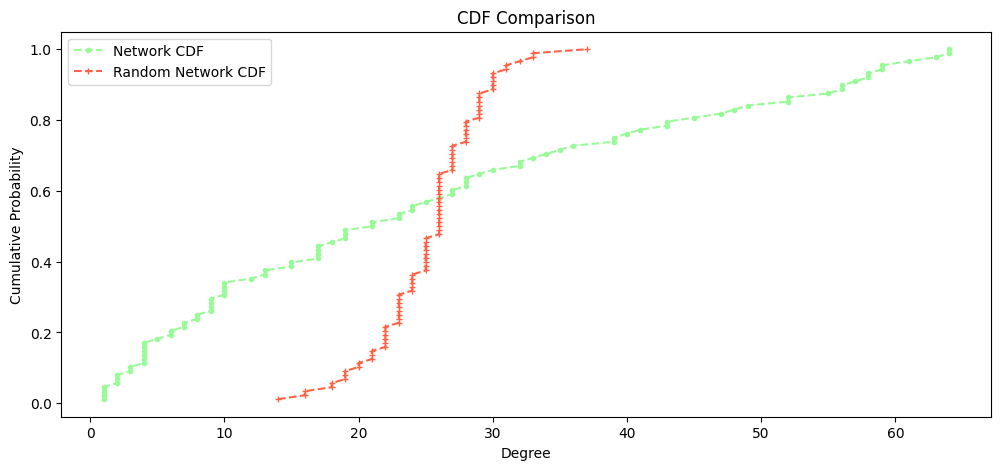

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Generate random data for random networks (replace this with your actual random network data)
random_graph = nx.fast_gnp_random_graph(GraphL.order(), nx.density(GraphL))
degree_sequence = list(dict(GraphL.degree()).values())
degree_counts = np.bincount(degree_sequence)
pdf = degree_counts / len(degree_sequence)

# CDF (Cumulative Distribution Function) for your network
ecdf_network = ecdf

# CDF (Cumulative Distribution Function) for random networks
ecdf_random = ECDF(list(dict(random_graph.degree()).values()))

# Plotting
plt.figure(figsize=(12, 5))

# Plot CDF of your network
plt.plot(ecdf_network.x, ecdf_network.y, color='palegreen', marker='o', linestyle='--', ms=3, label='Network CDF')

# Plot CDF of random networks
plt.plot(ecdf_random.x, ecdf_random.y, color='tomato', marker='+', linestyle='--', ms=5, label='Random Network CDF')

# Add labels and legend
plt.xlabel('Degree')
plt.ylabel('Cumulative Probability')
plt.title('CDF Comparison')
plt.legend()

plt.show()

In [ ]:
all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
corrs = [[scipy.stats.pearsonr(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] 
for c2 in all_centr]
centralities = ['degree', 'closeness','betweenness','eigenvector']

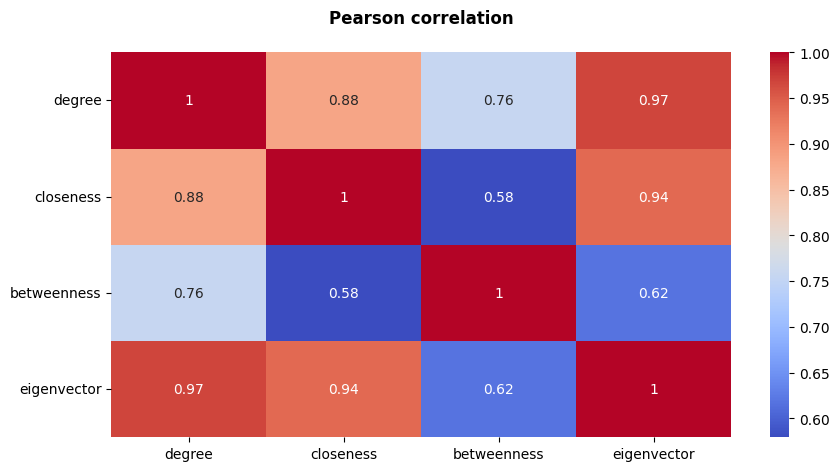

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(pd.DataFrame(corrs),annot = True,cmap = 'coolwarm')
plt.xticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.yticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.title('Pearson correlation\n', weight = 'bold')
plt.show()

In [ ]:
!pip install basemap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.3/940.3 kB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 13.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 96.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Number of communities: 9
Community 0:
  Number of nodes: 43
  Density: 0.4008859357696567
Community 1:
  Number of nodes: 2
  Density: 1.0
Community 2:
  Number of nodes: 10
  Density: 0.7333333333333333
Community 3:
  Number of nodes: 2
  Density: 1.0
Community 4:
  Number of nodes: 10
  Density: 0.9111111111111111
Community 5:
  Number of nodes: 3
  Density: 1.0
Community 6:
  Number of nodes: 5
  Density: 1.0
Community 7:
  Number of nodes: 11
  Density: 0.8
Community 8:
  Number of nodes: 2
  Density: 1.0


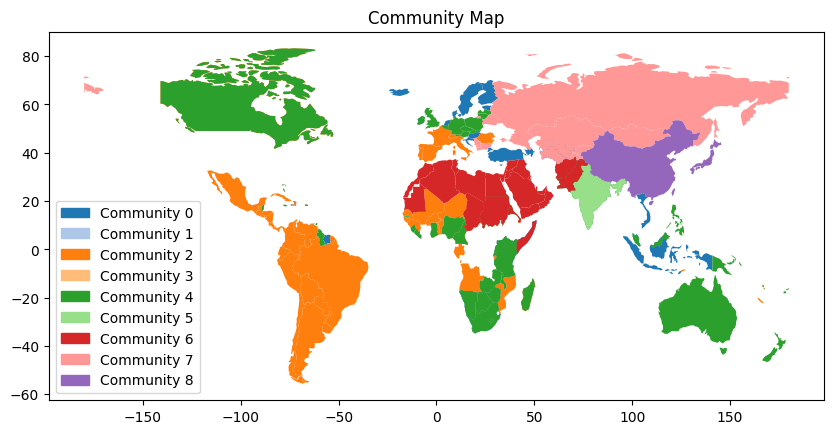

In [ ]:
import community as community_louvain
import requests
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming you've already defined G and partition
G = GraphL
partition = community_louvain.best_partition(G)
# Count the number of communities
num_communities = max(partition.values()) + 1
print("Number of communities:", num_communities)

# Create a dictionary to store countries for each community
communities_countries = {community_id: [] for community_id in range(num_communities)}

# Create a file to save the information
output_file = "community_information.txt"
with open(output_file, 'w') as f:
    # Calculate the density of each community
    community_density = {}
    for community_id in set(partition.values()):
        # Extract nodes belonging to the current community
        community_nodes = [node for node, comm in partition.items() if comm == community_id]
        # Create a subgraph with only the nodes belonging to the community
        community_subgraph = G.subgraph(community_nodes)
        # Calculate the density of the subgraph
        density = nx.density(community_subgraph)
        community_density[community_id] = density

    # Calculate centrality measures for each community
    for community_id in range(num_communities):
        # Extract nodes belonging to the current community
        community_nodes = [node for node, comm in partition.items() if comm == community_id]

        # Write the community information to the file
        f.write(f"Community {community_id}:\n")
        f.write(f"  Number of nodes: {len(community_nodes)}\n")
        f.write(f"  Density: {community_density.get(community_id, 0)}\n")
        f.write("  Nodes in the community:\n")
        
        # Make API requests for each language to get subregion and save the information
        for node in community_nodes:
            url = f"https://restcountries.com/v3.1/lang/{node}"
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if data:
                    for country_info in data:
                        common_name = country_info.get("name", {}).get("common")
                        if common_name:
                            f.write(f"      - {common_name} : {node} (Community {community_id})\n")
                            communities_countries[community_id].append(common_name)
                        else:
                            f.write("      - Common name not found\n")
                else:
                    f.write(f"    {node}: Error retrieving subregion\n")
        f.write("\n")

        print(f"Community {community_id}:")
        print(f"  Number of nodes: {len(community_nodes)}")
    
        print(f"  Density: {community_density.get(community_id, 0)}")
        

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a color map for communities
community_colors = plt.cm.tab20.colors[:num_communities]

# Plot the world map with different colors for each community
fig, ax = plt.subplots(figsize=(10, 5))
legend_handles = []
for community_id, color in zip(range(num_communities), community_colors):
    community_countries = world[world['name'].isin(communities_countries[community_id])]
    community_countries.plot(ax=ax, color=color, label=f'Community {community_id}')
    legend_handles.append(mpatches.Patch(color=color, label=f'Community {community_id}'))

plt.title('Community Map')
plt.legend(handles=legend_handles, loc='lower left')
plt.show()


In [ ]:
'''import geopandas as gpd
import matplotlib.pyplot as plt

def get_country(language):
    url = f"https://restcountries.com/v3.1/lang/{language}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data:
            countries = [country.get("name", {}).get("common") for country in data]
            return countries
    return []

top_15_edges = sorted(GraphL.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:15]

# Create a dictionary to map pairs to colors
pair_colors = {i: plt.cm.tab20(i % 20) for i in range(len(top_15_edges))}
print(pair_colors[1])
print 
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Initialize the 'color' column with default values
world['color'] = None

# Iterate over top edges
for i, (lang1, lang2, _) in enumerate(top_15_edges):
    # Get countries for each language
    countries1 = get_country(lang1)
    countries2 = get_country(lang2)
    
    # Iterate over pairs of countries
    for country1 in countries1:
        for country2 in countries2:
            # Check if the countries exist in the world GeoDataFrame
            if country1 in world['name'].values and country2 in world['name'].values:
                # Get the index of the pair
                pair_index = i
                print(pair_index,country1,country2)
                print(world)
                # Set the color of the countries in the pair
                world.loc[world['name'] == country1, 'color'] = pair_colors[pair_index]
                world.loc[world['name'] == country2, 'color'] = pair_colors[pair_index]
            else:
                print(f"Country {country1} or {country2} does not exist in the world GeoDataFrame.")

# Plot the world map with colored countries
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color=world['color'], edgecolor='black')
plt.title('Top 15 Pairs of Languages with Common Words on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()'''

(0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0)
0 Czechia Slovakia
         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    KOS        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa    

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
# Print country names from the world GeoDataFrame
print("Country names from world GeoDataFrame:")
for country_name in world['name'].unique():
    print(country_name)

# Print country names from pair_colors dictionary
print("\nCountry names from pair_colors dictionary:")
for pair in pair_colors.keys():
    print(pair)



Country names from world GeoDataFrame:
Fiji
Tanzania
W. Sahara
Canada
United States of America
Kazakhstan
Uzbekistan
Papua New Guinea
Indonesia
Argentina
Chile
Dem. Rep. Congo
Somalia
Kenya
Sudan
Chad
Haiti
Dominican Rep.
Russia
Bahamas
Falkland Is.
Norway
Greenland
Fr. S. Antarctic Lands
Timor-Leste
South Africa
Lesotho
Mexico
Uruguay
Brazil
Bolivia
Peru
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Venezuela
Guyana
Suriname
France
Ecuador
Puerto Rico
Jamaica
Cuba
Zimbabwe
Botswana
Namibia
Senegal
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Côte d'Ivoire
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Rep.
Congo
Gabon
Eq. Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Palestine
Gambia
Tunisia
Algeria
Jordan
United Arab Emirates
Qatar
Kuwait
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
Pakistan
Afghanistan
Tajikist

In [ ]:
nx.write_gexf(GraphL, "languagesGraphData.gexf")
